# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [34]:
import os

from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import requests as requests
import json
import datetime as dt
from dotenv import load_dotenv

In [35]:
load_dotenv()
api_key = os.environ.get('CRUX_API_KEY')
url = 'https://chromeuxreport.googleapis.com/v1/records:queryHistoryRecord'
params = {'key' : api_key}
metrics = ["largest_contentful_paint", "first_contentful_paint", "cumulative_layout_shift", "first_input_delay", "experimental_time_to_first_byte", "experimental_interaction_to_next_paint"]
data = '{"url": "https://www.showmax.com/join/eng/welcome/za", "formFactor" : "DESKTOP", "metrics": %s}' % metrics
headers = { 'Accept' : 'application/json', 'Content-Type': 'application/json'}
r = requests.post(url, headers=headers, params=params, data=data)
crux_data = r.json()

metrics_data = {}
for metric in metrics:
    metric_dict = {}
    for x in range(3):
        value = crux_data['record']['metrics'][metric]['histogramTimeseries'][x]['densities']
        metric_dict.update({x : value})
    metrics_data.update({metric : metric_dict})

dates = []
for period in crux_data['record']['collectionPeriods']:
    date = f'{period["firstDate"]["year"]}-{period["firstDate"]["month"]}-{period["firstDate"]["day"]}'
    dates.append(dt.datetime.strptime(date,'%Y-%m-%d').date())

plot_labels = {"largest_contentful_paint":['<2.5 (Good)', '>2.5  <4.0 (Needs Improvement)', '>4.0 (Poor)', '(in seconds)'], "first_contentful_paint":['<1.8 (Good)', '>1.8  <3.0 (Needs Improvement)', '>3.0 (Poor)','(in seconds)'], "cumulative_layout_shift":['<0.10 (Good)', '>0.10  <0.25 (Needs Improvement)', '>0.25 (Poor)'], "first_input_delay":['<100 (Good)', '>100  <300 (Needs Improvement)', '>300 (Poor)', '(in milliseconds)'], "experimental_time_to_first_byte":['<800 (Good)', '>800  <1800 (Needs Improvement)', '>1800 (Poor)', '(in milliseconds)', (1, 0.22)], "experimental_interaction_to_next_paint":['<200 (Good)', '>200  <500 (Needs Improvement)', '>500 (Poor)', '(in milliseconds)']}

plot_lines = ['g--', 'y-.', 'r:']

plot_titles = {"largest_contentful_paint": "Largest Contentful Paint", "first_contentful_paint": "First Contentful Paint", "cumulative_layout_shift": "Cumulative Layout Shift", "first_input_delay": "First Input Delay", "experimental_time_to_first_byte": "Time to First Byte", "experimental_interaction_to_next_paint":"Interaction to Next Paint"}

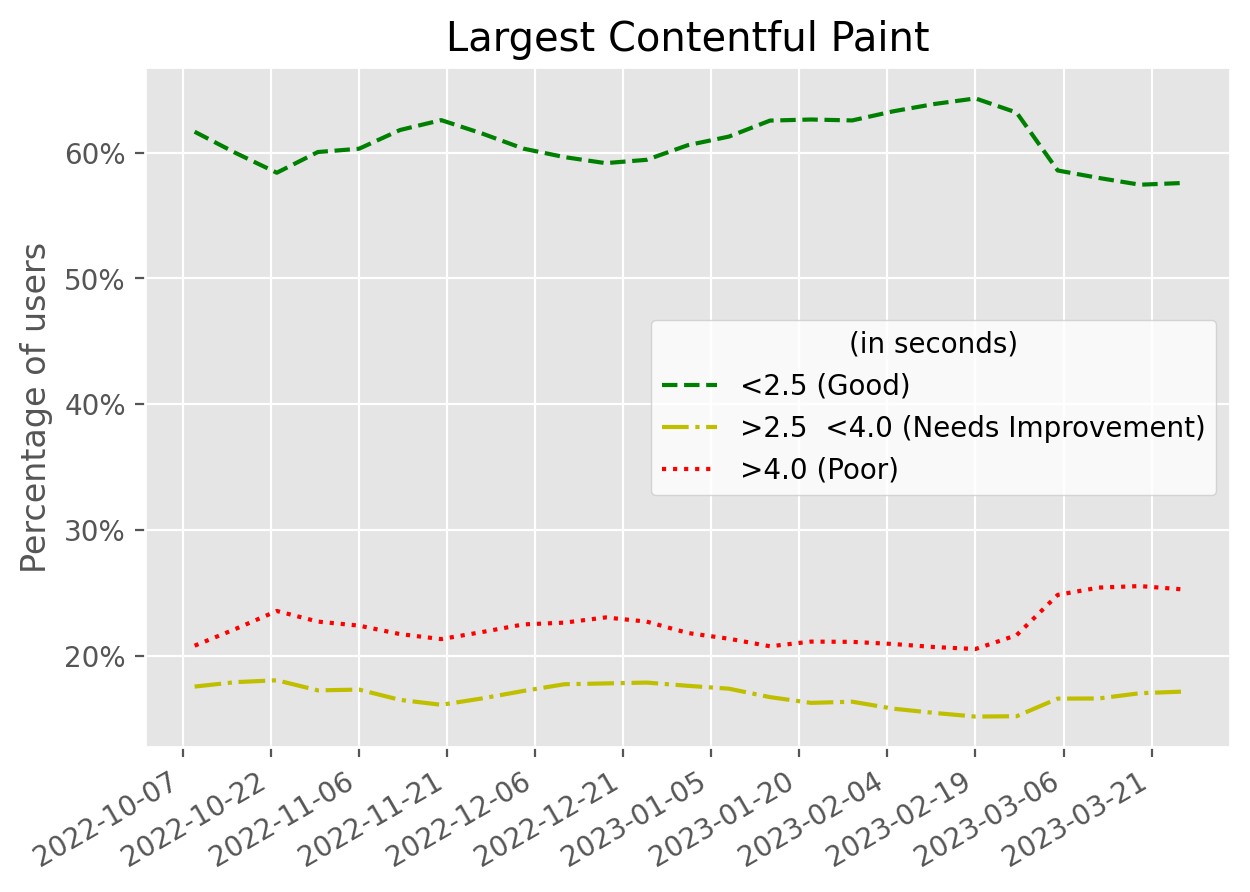

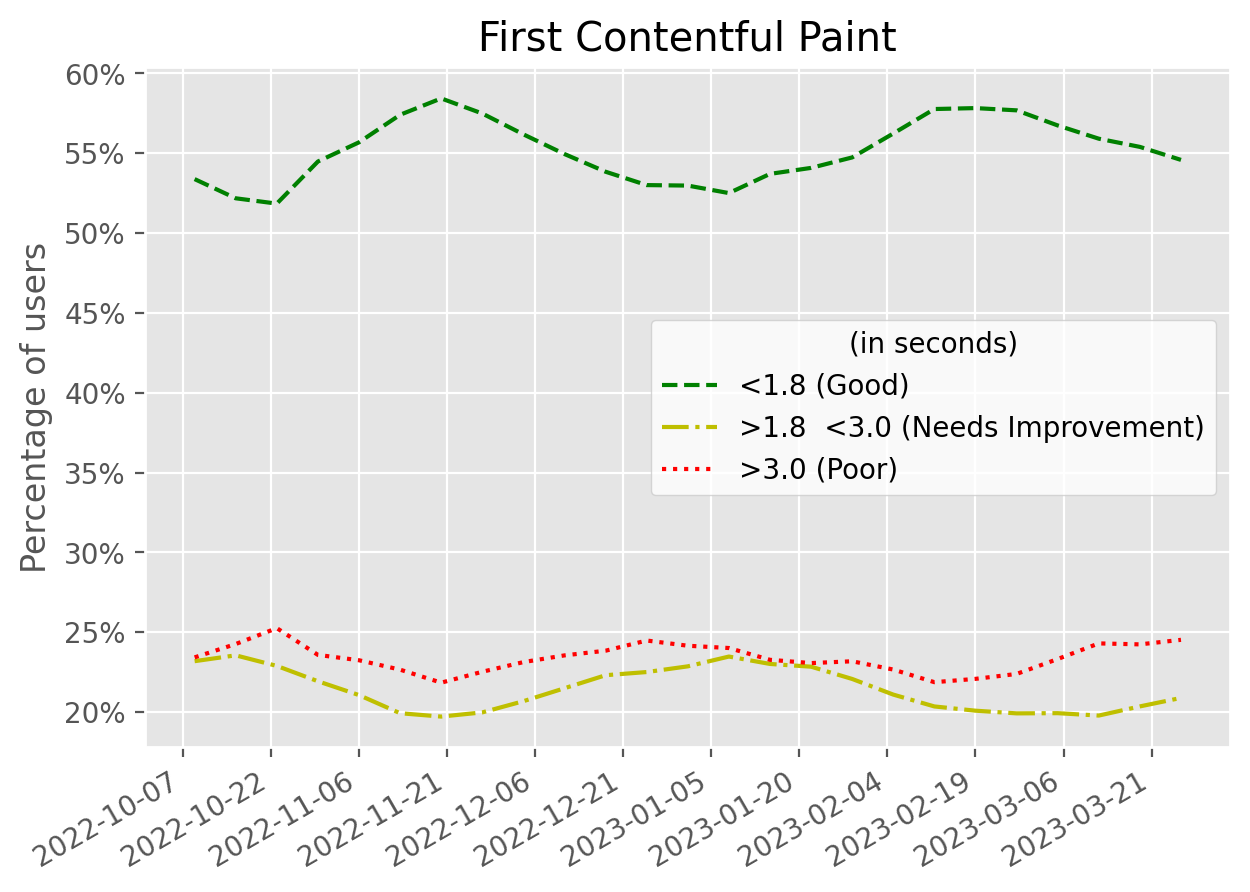

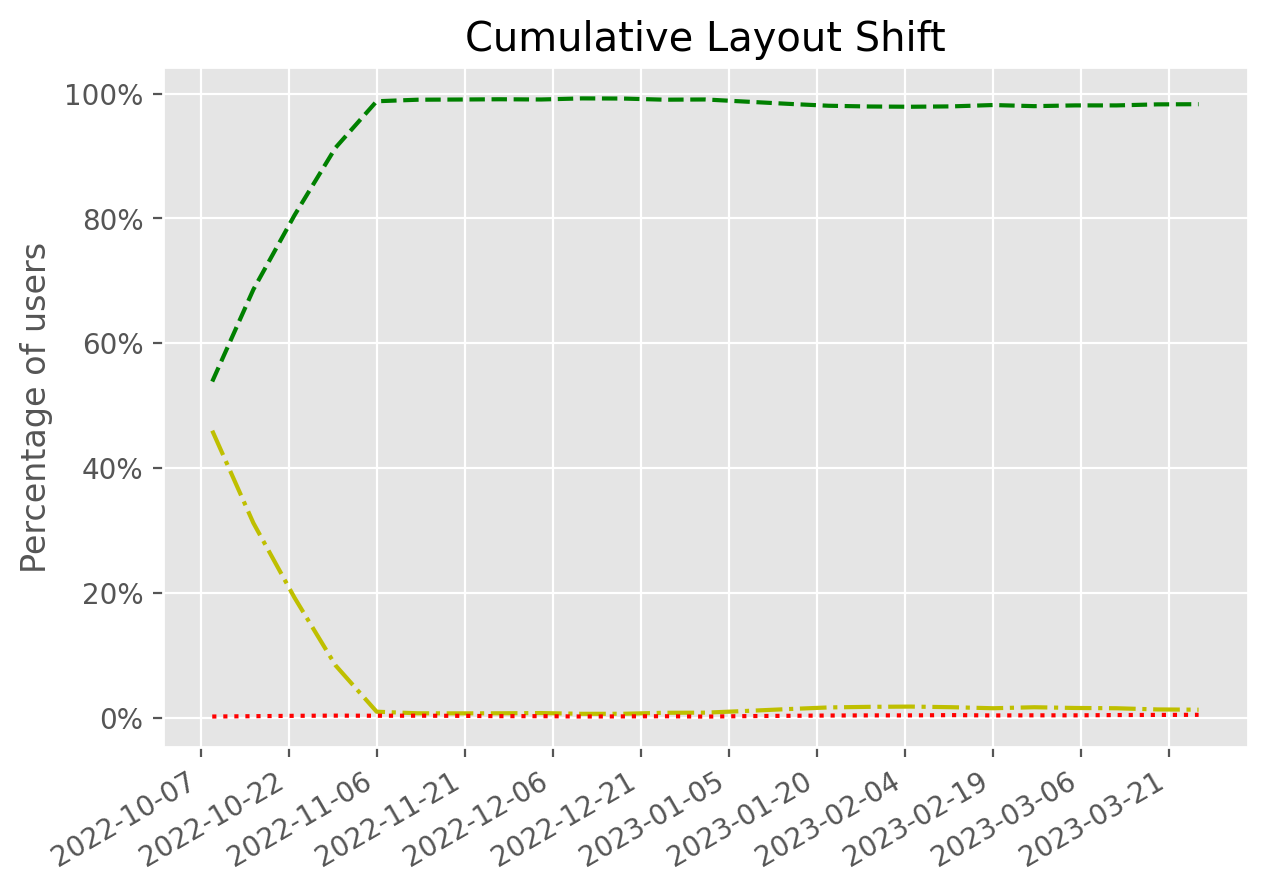

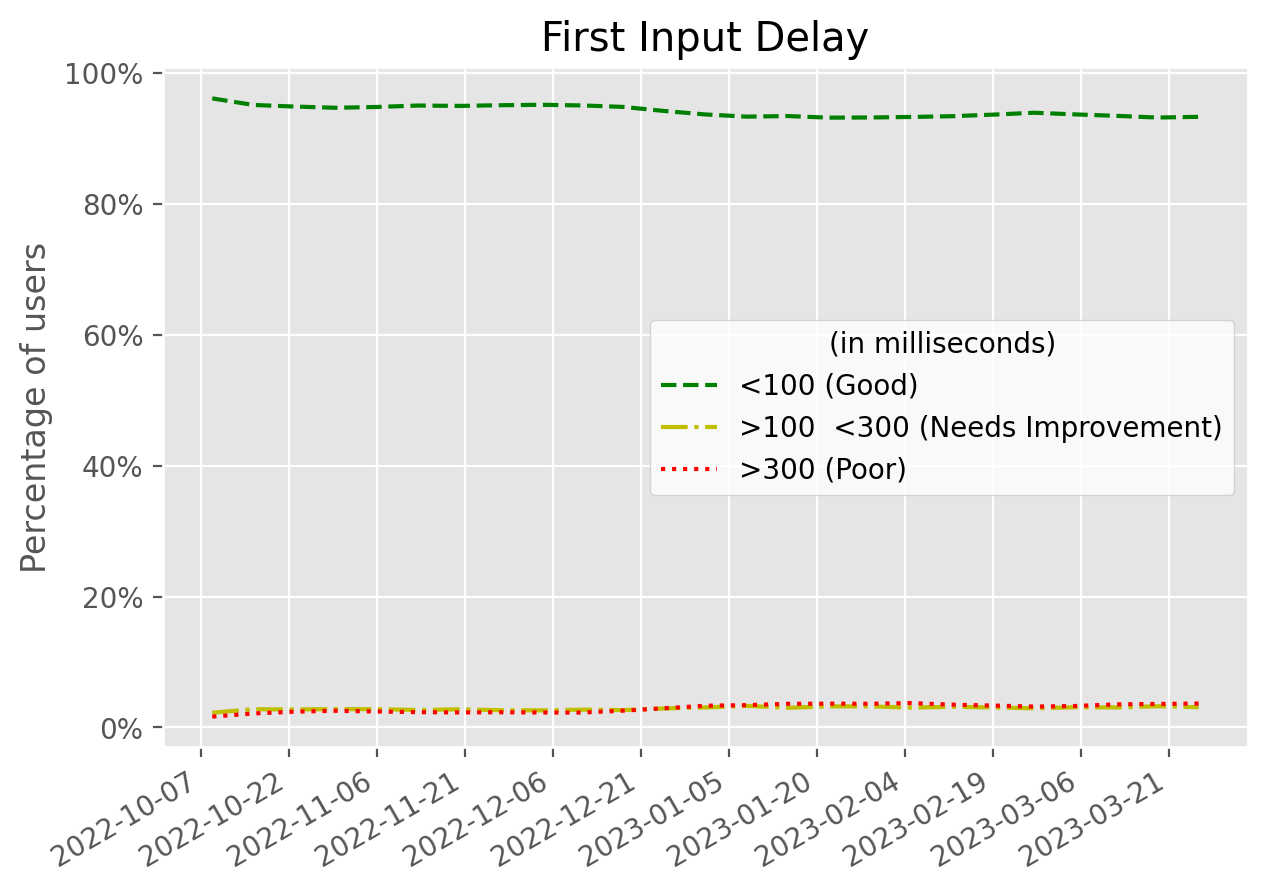

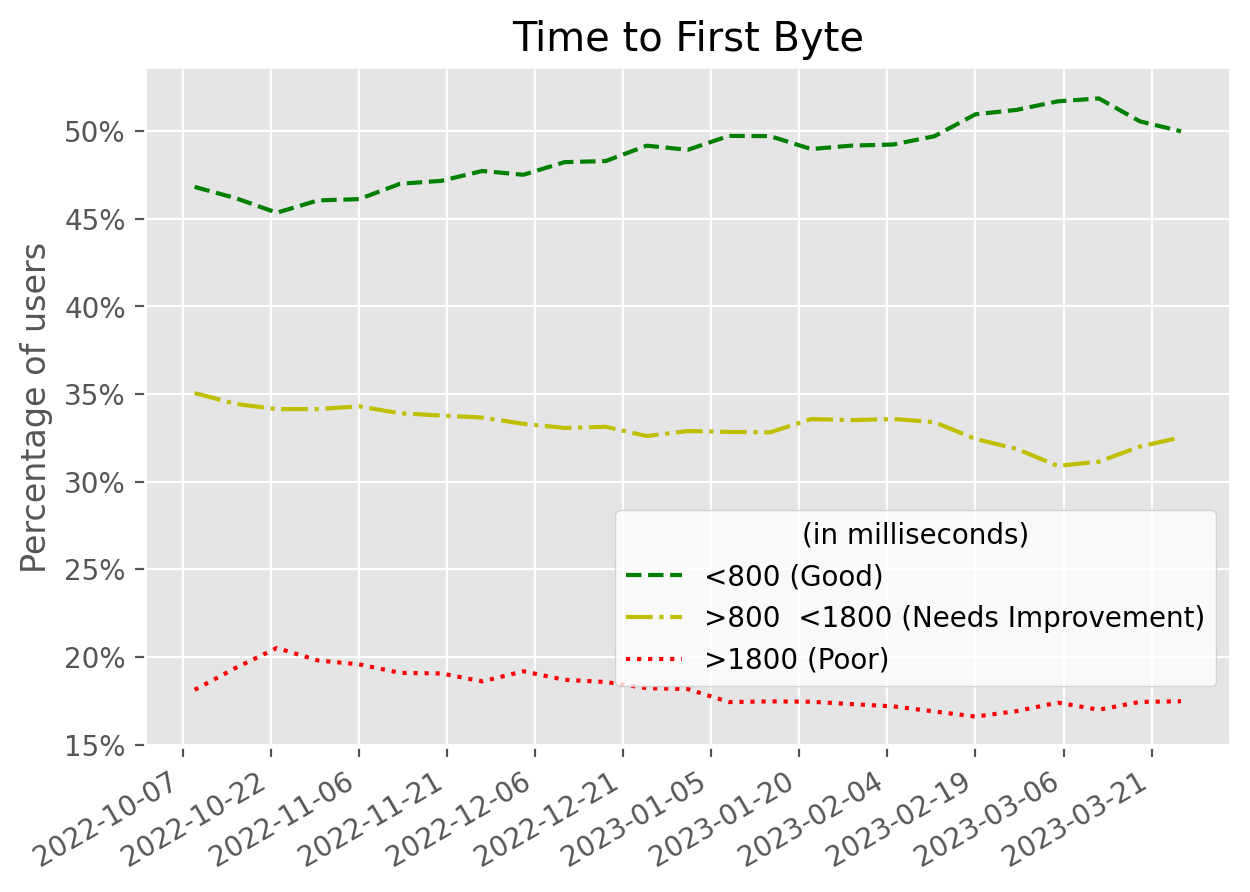

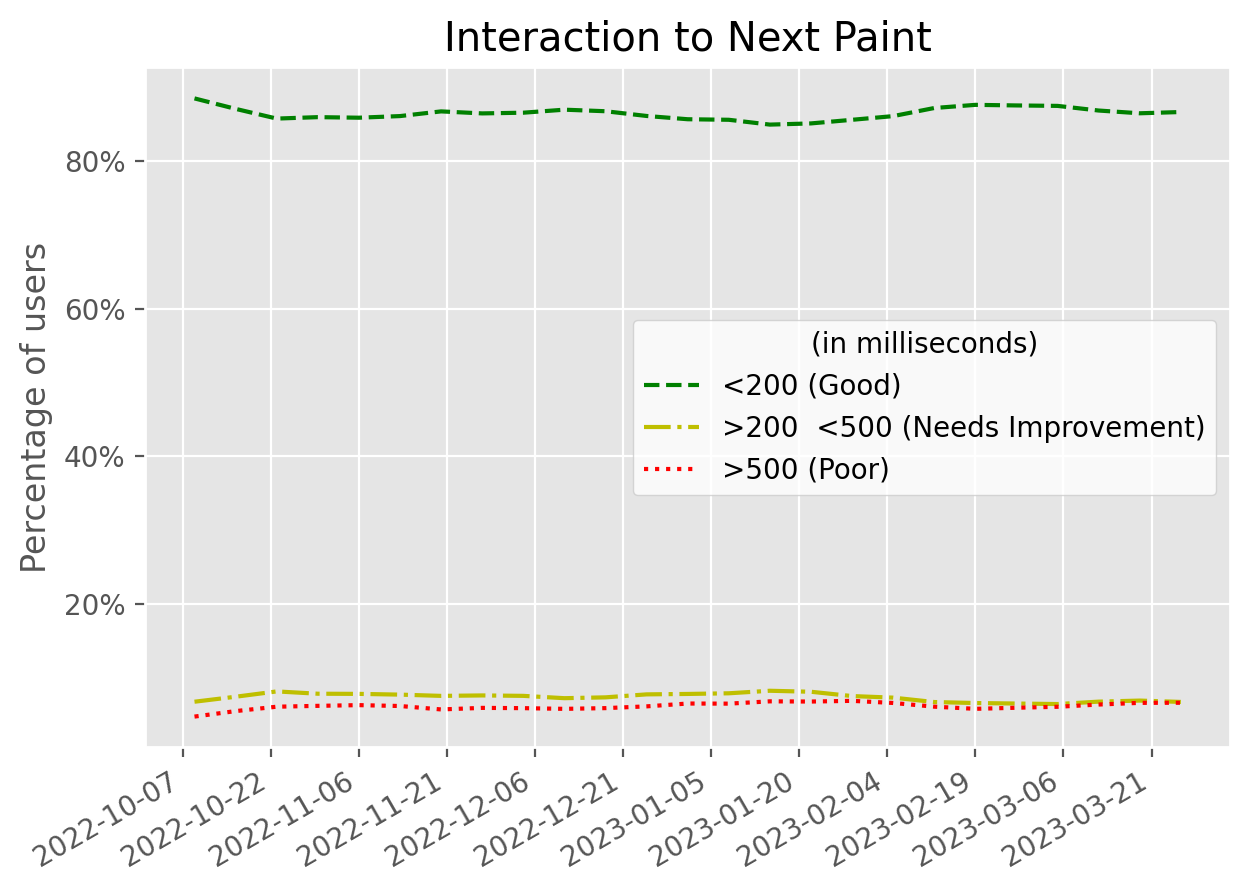

In [38]:
for md in metrics_data.keys():
    plt.figure(figsize=(7,5), dpi=200)
    for density in metrics_data[md].keys():
        plt.plot(dates, metrics_data[md][density], plot_lines[density], label=plot_labels[md][density])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
    plt.gcf().autofmt_xdate()
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))
    plt.title(plot_titles[md])
    plt.ylabel('Percentage of users')
    if len(plot_labels[md]) > 3:
        plt.legend(loc='center right', facecolor='white', title=plot_labels[md][3])
    if len(plot_labels[md]) > 4:
        plt.legend(loc='center right', facecolor='white', bbox_to_anchor=(plot_labels[md][4][0], plot_labels[md][4][1]), title=plot_labels[md][3])
    plt.savefig(f'./_build/html/_images/{md}.png')



There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)